In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
# read data and set date as datetime index
data = pd.read_table("data/m_logret_10stocks.txt")
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.dropna()

In [3]:
data.describe()

,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.006894,0.007686,0.003922,0.002309,0.011894,-0.002486,0.005012,0.005677,0.007293,0.006934
std,0.067448,0.066741,0.028076,0.084521,0.059347,0.080658,0.048010,0.038510,0.044930,0.062071
min,-0.373957,-0.259744,-0.075338,-0.220782,-0.185391,-0.433980,-0.137409,-0.111557,-0.182717,-0.185438
25%,-0.033782,-0.031371,-0.013916,-0.052809,-0.018908,-0.052287,-0.028592,-0.017651,-0.016998,-0.023118
50%,0.012911,0.016408,0.005409,0.009636,0.006774,-0.002465,0.004658,0.003624,0.007736,0.010017
75%,0.050470,0.046834,0.021271,0.060755,0.049704,0.052863,0.038262,0.028615,0.030234,0.039329
max,0.162253,0.267841,0.087612,0.250741,0.175427,0.221079,0.167592,0.131565,0.148389,0.218143


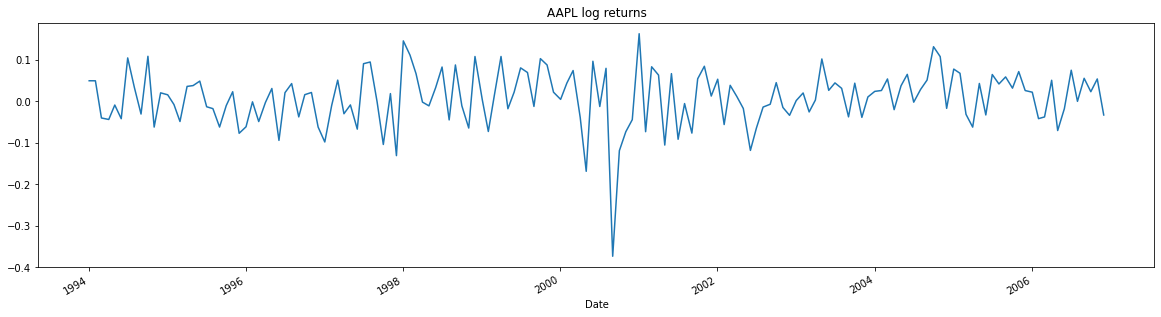

In [4]:
# As an example, we examine the log returns for the AAPL stock.
data['AAPL'].plot(figsize=(20,5))
plt.title("AAPL log returns");

### Part (a) 
We compute the sample mean μ and the sample covariance matrix Σ of the log returns.

In [5]:
mean = data.mean()
mean

AAPL    0.006894
ADBE    0.007686
ADP     0.003922
AMD     0.002309
DELL    0.011894
GTW    -0.002486
HP      0.005012
IBM     0.005677
MSFT    0.007293
ORCL    0.006934
dtype: float64

In [6]:
covariance = data.cov()
covariance

,AAPL,ADBE,ADP,AMD,DELL,GTW,HP,IBM,MSFT,ORCL
AAPL,0.004549,0.001328,0.000129,0.002612,0.001928,0.002242,0.000730,0.000950,0.000899,0.001341
ADBE,0.001328,0.004454,0.000516,0.001755,0.001145,0.001939,0.000694,0.000447,0.000610,0.001176
ADP,0.000129,0.000516,0.000788,0.000501,0.000377,0.000577,0.000295,0.000415,0.000324,0.000381
AMD,0.002612,0.001755,0.000501,0.007144,0.001996,0.003081,0.000902,0.001580,0.001186,0.001540
DELL,0.001928,0.001145,0.000377,0.001996,0.003522,0.002546,0.000546,0.001075,0.001605,0.001194
GTW,0.002242,0.001939,0.000577,0.003081,0.002546,0.006506,0.000467,0.001024,0.001441,0.001110
HP,0.000730,0.000694,0.000295,0.000902,0.000546,0.000467,0.002305,0.000483,0.000089,0.000308
IBM,0.000950,0.000447,0.000415,0.001580,0.001075,0.001024,0.000483,0.001483,0.000901,0.000835
MSFT,0.000899,0.000610,0.000324,0.001186,0.001605,0.001441,0.000089,0.000901,0.002019,0.000918
ORCL,0.001341,0.001176,0.000381,0.001540,0.001194,0.001110,0.000308,0.000835,0.000918,0.003853


### Part (b)
Here we assume that the monthly target return is 0.3% and that short selling is allowed. Now we estimate the optimal portfolio weights by replacing (μ, Σ) in Markowitz’s theory by estimators for μ,Σ.

In [7]:
def calc_w_eff(mu, sigma, mustar):
    """
    calculates the effecient weights for any given mean, covariance
    matrix and required return mustar
    """
    ones = np.ones((mu.shape[0],))
    ones_t = ones.T
    sigmainv = inv(sigma)
    sigmainv_ones = sigmainv.dot(ones)
    sigmainv_mu = sigmainv.dot(mu)
    
    A = ones_t.dot(sigmainv_mu)
    B = (mu.T).dot(sigmainv_mu)
    C = ones_t.dot(sigmainv_ones)
    D = B*C - A*A
    
    middle_term = np.multiply(sigmainv_mu, C) - np.multiply(sigmainv_ones, A)
    wd = np.multiply(sigmainv_ones, B) - np.multiply(sigmainv_mu, A) + np.multiply(middle_term, mustar)
    w_eff = np.multiply(wd, 1/D)
    var_eff = (B - 2*mustar*A + mustar*mustar*C)/D
    
    return w_eff, math.sqrt(var_eff)

In [8]:
# calculating efficient portfolio weights
mu = mean.to_numpy()
sigma = covariance.to_numpy()
w_eff, stddev_eff = calc_w_eff(mu,sigma,0.003)
w_eff

array([ 0.07136165, -0.02964316,  0.64982619, -0.023669  , -0.19107218,
        0.07856725,  0.16168683,  0.09650606,  0.16306989,  0.02336648])

### Part (c)
We plot the effecient Markowitze frontier.

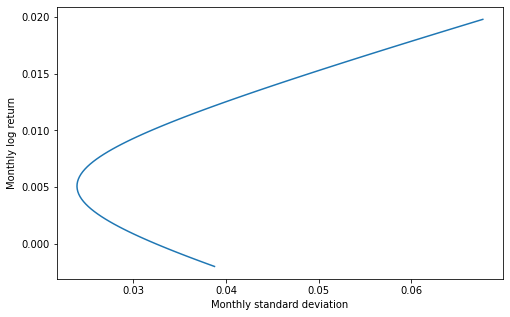

In [9]:
# plotting the Markowitz frontier
mu_list = [-0.002+0.00022*i for i in range(100)]
stddev_list = []
for item in mu_list:
    stddev_list.append(calc_w_eff(mu,sigma,item)[1])
plt.plot(stddev_list, mu_list);
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

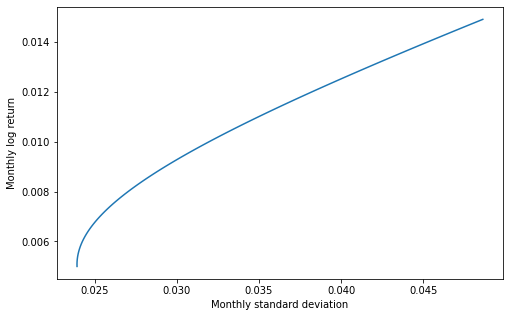

In [10]:
# plotting the efficient frontier - note that the efficient frontier is 
# simply the upper part of the entire Markowitz frontier
mu_list_eff = [0.005+0.00010*i for i in range(100)]
stddev_list_eff = []
for item in mu_list_eff:
    stddev_list_eff.append(calc_w_eff(mu,sigma,item)[1])
plt.plot(stddev_list_eff, mu_list_eff);
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

### Part (c)
The estimated (“plug-in”) efficient frontier replaces μ and Σ in the optimal portfolio weight vector weff
by the sample mean μ and covariance matrix Σ. Since the sample statistics differ from μ and Σ, this “plug-in” frontier is in fact suboptimal. Frankfurter, Phillips, and Seagle (1971) and Jobson and Korkie (1980) have found that portfolios thus constructed may perform worse than the equally weighted portfolio.
To adjust for sampling variability of the estimates of μ and Σ , Michaud (1989) advocates using a “resampled” efficient frontier instead of the plug-in frontier. Here we perform bootstrap resampling to account for this.

In [11]:
# bootstrap resampling function
def bootstrap(data, b_num, mustar_bs):
    """
    this function samples data values for every stock and caluclates the efficient portfolio weighting
    for every such sample to reduce the bias in the "plug-in" efficient weighting
    """
    w_eff_bs = []
    for i in range(b_num):
        sample = data.sample(n=data.shape[0], replace=True)
        mu_bs = sample.mean().to_numpy()
        sigma_bs = sample.cov().to_numpy()
        w_eff_bs.append(calc_w_eff(mu_bs, sigma_bs, mustar_bs)[0])
        
    w_eff_bs = sum(w_eff_bs)/b_num
    return w_eff_bs    

In [12]:
# use 500 bootstrap samples to recreate the efficient portfolio
mu_list_bs = []
stddev_list_bs = []
w_bar = []
for item in mu_list:
    w_bar = bootstrap(data, 500, item)
    mu_list_bs.append((w_bar.T).dot(mu))
    stddev_list_bs.append(math.sqrt((w_bar.T).dot(sigma).dot(w_bar)))

weights = bootstrap(data, 500, 0.003) # to print weights for mu*=0.003
weights

array([ 0.07299379, -0.01226708,  0.62223469, -0.03198537, -0.11966106,
        0.02461949,  0.15539239,  0.09670605,  0.16755771,  0.02440939])

### Part (e)
We plot Michaud’s resampled efficient frontier using B = 500 bootstrap samples and compare with the plot originally obtained.

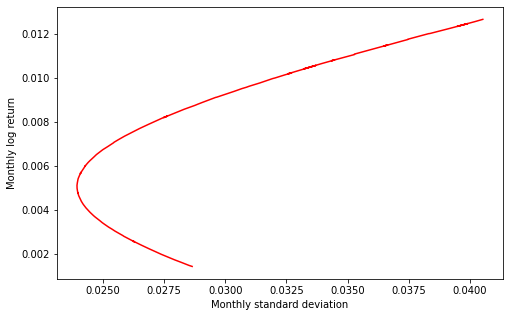

In [13]:
# plot the resamples efficient frontier
plt.plot(stddev_list_bs, mu_list_bs, 'r');
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

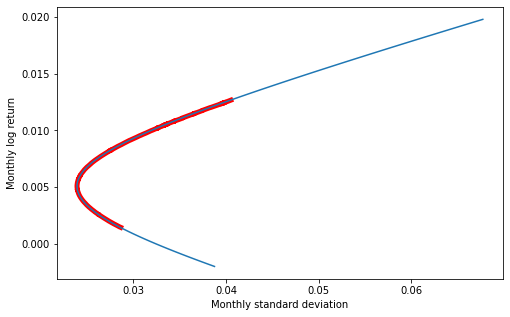

In [14]:
# overlay the plot obtained on the original efficient frontier
plt.plot(stddev_list_bs, mu_list_bs, 'r', linewidth=5.0);
plt.plot(stddev_list, mu_list);
plt.ylabel("Monthly log return");
plt.xlabel("Monthly standard deviation");
fig = plt.gcf()
fig.set_size_inches(8, 5)

We can see that the bootstrapped plot (thickened for visualization) lies almost exactly on the Markowitz frontier, but it does not span the entire range of $\mu$ values. Since our sample estimates of μ and Σ were good estimates of the population parameters, this is what we should have expected.